https://www.kaggle.com/code/abaliyan/hotel-booking-eda
https://www.kaggle.com/datasets/mojtaba142/hotel-booking/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime
from matplotlib.ticker import FuncFormatter
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
%matplotlib inline

In [4]:
hotel=pd.read_csv(r"C:\Users\aless\OneDrive\Desktop\PDF Neural Academy\file_csv\hotel_booking.csv")
hotel1=pd.read_csv(r"C:\Users\aless\OneDrive\Desktop\PDF Neural Academy\file_csv\hotel_booking.csv")
hotel.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
74772,City Hotel,0,241,2015,October,43,19,1,2,1,...,Transient-Party,50.00,0,0,Check-Out,2015-10-22,Deborah Brown,Brown_Deborah@att.com,100-416-7973,************6171
96148,City Hotel,0,1,2016,August,35,27,1,1,2,...,Transient,228.00,1,1,Check-Out,2016-08-29,Jessica Fitzgerald,Fitzgerald_Jessica27@yahoo.com,860-673-5654,************6696
1349,Resort Hotel,1,77,2015,August,35,25,2,7,2,...,Transient,166.00,0,0,Canceled,2015-07-20,Mario Baldwin,Mario.Baldwin20@yandex.com,423-671-1646,************9548
47832,City Hotel,0,80,2016,March,10,5,1,1,2,...,Transient,53.97,0,1,Check-Out,2016-03-07,Mr. Noah James,Mr.James@xfinity.com,575-269-4499,************9157
44619,City Hotel,0,62,2015,October,41,8,0,3,2,...,Transient-Party,72.25,0,0,Check-Out,2015-10-11,John Adams,John.A@gmail.com,486-444-9129,************1987


In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [3]:
hotel1=hotel.copy()
hotel1.children=hotel1.children.convert_dtypes(convert_integer=True)
hotel1.adr=hotel1.adr.convert_dtypes(convert_integer=True)
hotel1.adr=hotel1.adr.astype('int64')

In [4]:
#creo una tabella date e modifico il type di alcune colonne 
mesi = ["January","February","March","April","May","June","July","August","September","October","November","December"]
numeri = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

for x,y in zip(mesi,numeri):
         hotel['arrival_date_month']=hotel['arrival_date_month'].replace(x,y)
for i in range(len(hotel)):
    hotel['arrival_date_year'][i] = datetime(hotel['arrival_date_year'][i], hotel['arrival_date_month'][i], hotel['arrival_date_day_of_month'][i]).date()
hotel=hotel.drop(columns=['arrival_date_month','arrival_date_day_of_month','credit_card'])  
hotel.children=hotel.children.convert_dtypes(convert_integer=True)
hotel.adr=hotel.adr.astype('int64')
hotel = hotel.rename(columns={'arrival_date_year': 'date'})
hotel['date'] = pd.to_datetime(hotel['date'])


In [7]:
hotel

,hotel,is_canceled,lead_time,date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number
0,Resort Hotel,0,342,2015-07-01,27,0,0,2,0,0,...,0,Transient,0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661
1,Resort Hotel,0,737,2015-07-01,27,0,0,2,0,0,...,0,Transient,0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955
2,Resort Hotel,0,7,2015-07-01,27,0,1,1,0,0,...,0,Transient,75,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745
3,Resort Hotel,0,13,2015-07-01,27,0,1,1,0,0,...,0,Transient,75,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427
4,Resort Hotel,0,14,2015-07-01,27,0,2,2,0,0,...,0,Transient,98,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017-08-30,35,2,5,2,0,0,...,0,Transient,96,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582
119386,City Hotel,0,102,2017-08-31,35,2,5,3,0,0,...,0,Transient,225,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612
119387,City Hotel,0,34,2017-08-31,35,2,5,2,0,0,...,0,Transient,157,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100
119388,City Hotel,0,109,2017-08-31,35,2,5,2,0,0,...,0,Transient,104,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017


In [188]:
hotel1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  Int64  
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
hotel.duplicated().sum()

0

In [8]:
hotel.describe()

,is_canceled,lead_time,date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119386.0,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016-08-28 16:39:45.727447808,27.165173,0.927599,2.500302,1.856403,0.10389,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
min,0.000000,0.000000,2015-07-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016-03-13 00:00:00,16.000000,0.000000,1.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016-09-06 00:00:00,28.000000,1.000000,2.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017-03-18 00:00:00,38.000000,2.000000,3.000000,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017-08-31 00:00:00,53.000000,19.000000,50.000000,55.000000,10.0,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000
std,0.482918,106.863097,NaN,13.605138,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798


# ANALISI TIPI DI CLIENTI E PREFERENZE

Text(0.5, 1.0, 'Totale di adulti,bambini e neonati')

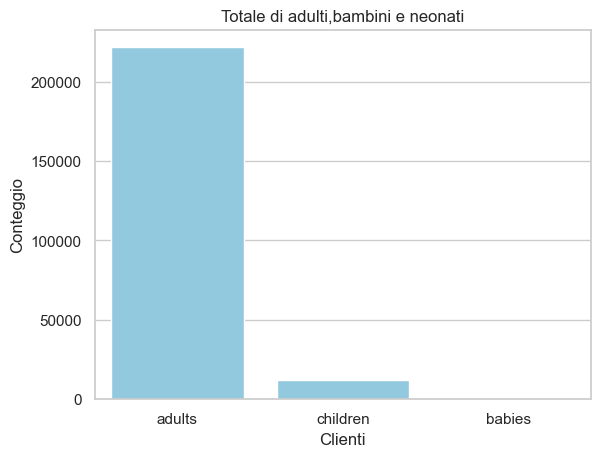

In [31]:
sns.barplot(x=[hotel.columns[7],hotel.columns[8],hotel.columns[9]],
            y=[hotel.adults.sum(),hotel.children.sum(),hotel.babies.sum()], 
            color=('skyblue')
           )
plt.ylabel('Conteggio')
plt.xlabel('Clienti')
plt.title('Totale di adulti,bambini e neonati')

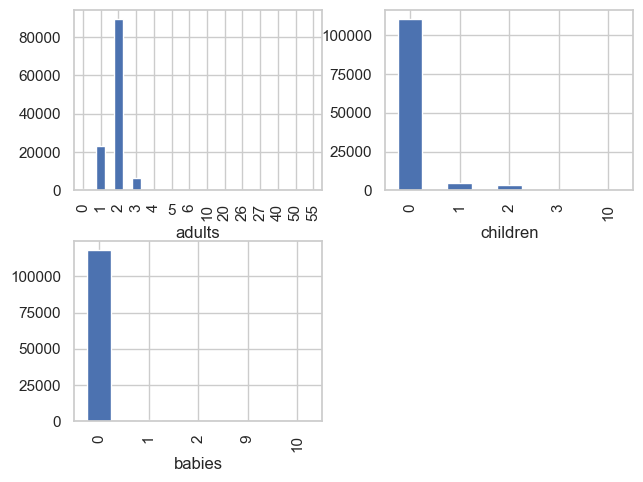

In [147]:
for i in range (1, 4):
    plt.subplot(2, 2, i)
    plt.tight_layout()
ax=plt.subplot(221);
hotel['adults'].value_counts().sort_index().plot(kind='bar');

plt.subplot(222);
hotel['children'].value_counts().sort_index().plot(kind='bar');

plt.subplot(223);
hotel['babies'].value_counts().sort_index().plot(kind='bar');

plt.show()

In [45]:
hotel1[hotel1['arrival_date_month']==("January","February","March","April","May","June","July")]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card


Text(0.5, 1.0, 'Percentuale prenotazioni clienti top 15 paesi')

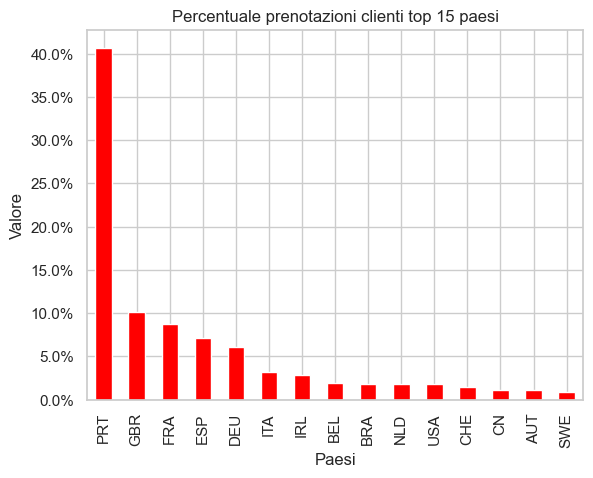

In [41]:
round(hotel.country.value_counts()/len(hotel)*100,2).head(15).plot(kind='bar',color='red')
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.ylabel('Valore')
plt.xlabel('Paesi')
plt.title('Percentuale prenotazioni clienti top 15 paesi')

Text(0.5, 1.0, 'Preferenza Hotel')

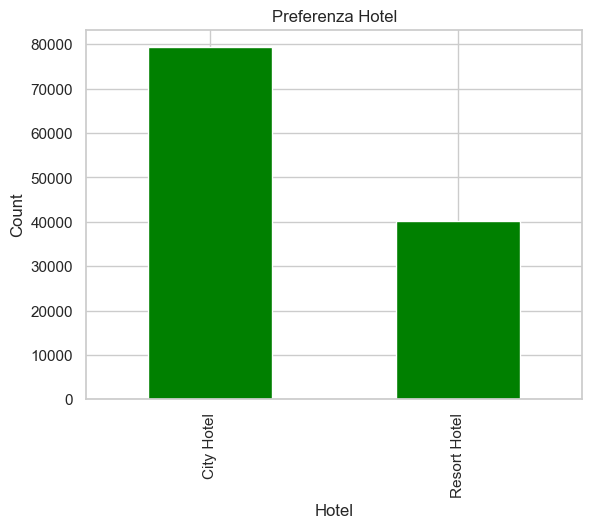

In [71]:
hotel.hotel.value_counts().plot(kind='bar',color='green')
plt.ylabel('Count')
plt.xlabel('Hotel')
plt.title('Preferenza Hotel')

In [72]:
hotel.hotel.value_counts()

hotel
City Hotel      79330
Resort Hotel    40060
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferenza Hotel con compagnia')

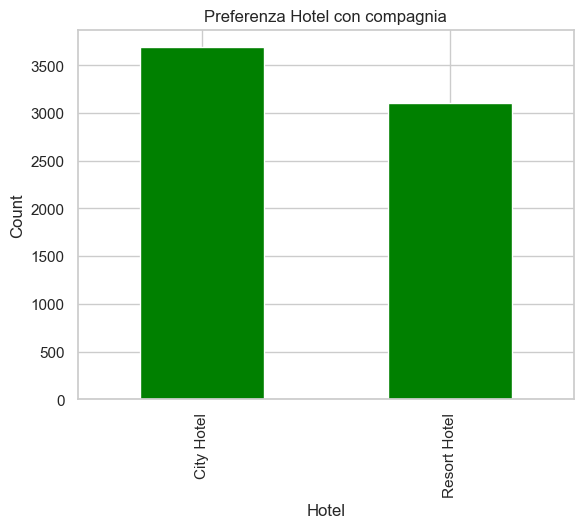

In [68]:
#chi si affida a una compagnia in media va molto piu nei resort o comunque in entrambi,probabilmente perchè è gente piu ricca
hotel[hotel.company.notnull()].hotel.value_counts().plot(kind='bar',color='green')
plt.ylabel('Count')
plt.xlabel('Hotel')
plt.title('Preferenza Hotel con compagnia')

In [67]:
hotel[hotel.agent.notnull()].hotel.value_counts()

hotel
City Hotel      71199
Resort Hotel    31851
Name: count, dtype: int64

Text(0.5, 1.0, 'Preferenza Hotel con agente')

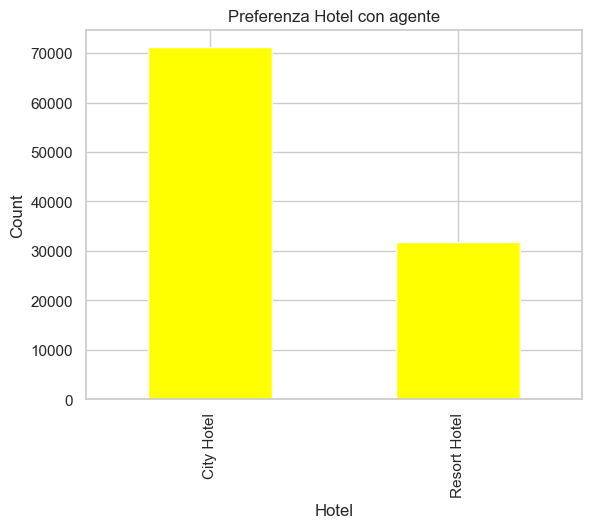

In [69]:
hotel[hotel.agent.notnull()].hotel.value_counts().plot(kind='bar',color='yellow')
plt.ylabel('Count')
plt.xlabel('Hotel')
plt.title('Preferenza Hotel con agente')

# Andamento City e Resort Hotel durante l'anno

In [22]:
hotel[hotel['hotel']=='Resort Hotel']

,hotel,is_canceled,lead_time,date,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number
0,Resort Hotel,0,342,2015-07-01,27,0,0,2,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661
1,Resort Hotel,0,737,2015-07-01,27,0,0,2,0,0,...,0,Transient,0.00,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955
2,Resort Hotel,0,7,2015-07-01,27,0,1,1,0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745
3,Resort Hotel,0,13,2015-07-01,27,0,1,1,0,0,...,0,Transient,75.00,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427
4,Resort Hotel,0,14,2015-07-01,27,0,2,2,0,0,...,0,Transient,98.00,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Resort Hotel,0,212,2017-08-31,35,2,8,2,1,0,...,0,Transient,89.75,0,0,Check-Out,2017-09-10,Willie Hamilton,Hamilton_Willie@mail.com,172-436-4780
40056,Resort Hotel,0,169,2017-08-30,35,2,9,2,0,0,...,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,Carrie Walker,Carrie_Walker@yahoo.com,141-149-4764
40057,Resort Hotel,0,204,2017-08-29,35,4,10,2,0,0,...,0,Transient,153.57,0,3,Check-Out,2017-09-12,Joshua Small,Joshua_Small@aol.com,769-653-1129
40058,Resort Hotel,0,211,2017-08-31,35,4,10,2,0,0,...,0,Contract,112.80,0,1,Check-Out,2017-09-14,Michele Hanson,MHanson@yahoo.com,670-269-4799


In [217]:
hotel.date.value_counts().index[0]

datetime.date(2015, 12, 5)

In [169]:
hotel1.arrival_date_year.value_counts()

arrival_date_year
2016    56707
2017    40687
2015    21996
Name: count, dtype: int64

In [66]:
hotel1[hotel1['arrival_date_year']==2016].arrival_date_month.value_counts().loc[["September","October","November","December"]].sum()

19911

In [9]:
calendario=pd.DataFrame({'Mesi':mesi},index=(1,2,3,4,5,6,7,8,9,10,11,12))
data=[]
for e in range(2015,2018):
    data=[]
    for i in (mesi):
        mese=resort[(resort['arrival_date_month']==i)&(resort['is_canceled']==0)&(resort['arrival_date_year']==e)].arrival_date_month.value_counts().sum()
        data.append(mese)

    calendario[e]=data
   


In [8]:
calendario

,Mesi,2015,2016,2017
1,January,0,926,1328
2,February,0,1441,1623
3,March,0,1938,2134
4,April,0,2022,1993
5,May,0,2240,2339
6,June,0,2203,2163
7,July,459,2088,2235
8,August,1248,2131,2002
9,September,1986,2304,0
10,October,2065,2272,0


In [10]:
calendario

,Mesi,2015,2016,2017
1,January,0,765,1103
2,February,0,1113,1195
3,March,0,1409,1164
4,April,0,1345,1205
5,May,0,1323,1212
6,June,0,993,1045
7,July,1058,985,1094
8,August,1043,1107,1107
9,September,1034,1068,0
10,October,1160,1417,0


In [92]:
calendario['%incremento_2017']=round(calendario[2017]/calendario[2016],2)

In [93]:
calendario=calendario.drop(columns=2015)
calendario

,Mesi,2016,2017,%incremento_2017
1,January,926,1328,1.43
2,February,1441,1623,1.13
3,March,1938,2134,1.10
4,April,2022,1993,0.99
5,May,2240,2339,1.04
6,June,2203,2163,0.98
7,July,2088,2235,1.07
8,August,2131,2002,0.94
9,September,2304,0,0.00
10,October,2272,0,0.00


In [94]:
calendario[2016].iloc[0:8].sum()

14989

In [95]:
calendario[2017].iloc[0:8].sum()

15817

In [82]:
calendario

,Mesi,2016,2017,%incremento_2017
1,January,926,1328,1.43
2,February,1441,1623,1.13
3,March,1938,2134,1.10
4,April,2022,1993,0.99
5,May,2240,2339,1.04
6,June,2203,2163,0.98
7,July,2088,2235,1.07
8,August,2131,2002,0.94
9,September,2304,0,0.00
10,October,2272,0,0.00


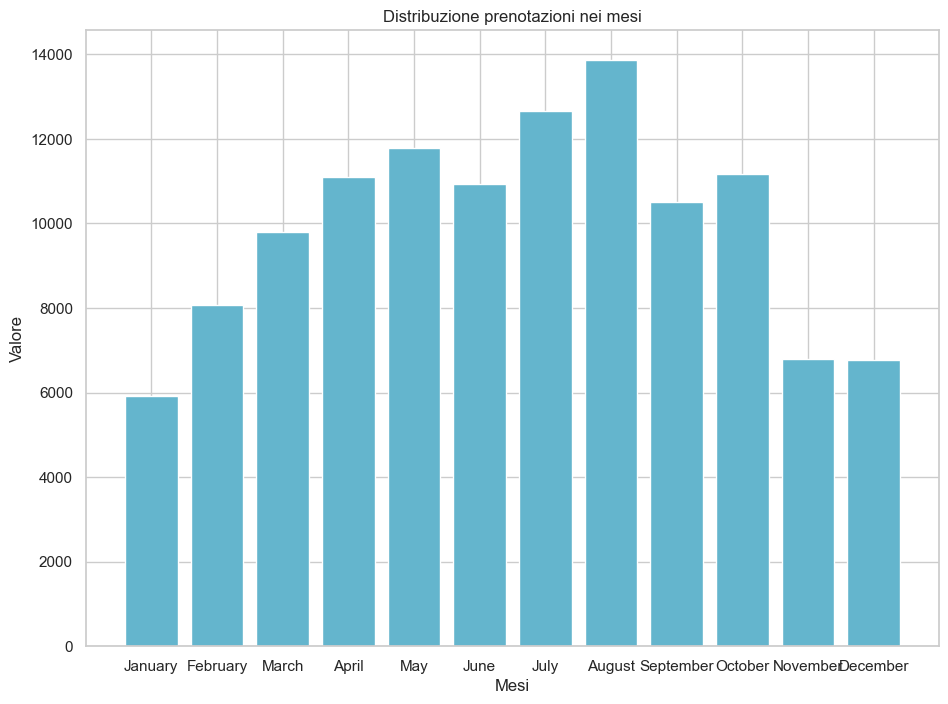

In [95]:
plt.figure(figsize=(11,8))
plt.bar(hotel1.arrival_date_month.value_counts().loc[mesi].index,hotel1.arrival_date_month.value_counts().loc[mesi],color='c')
plt.ylabel('Valore')
plt.xlabel('Mesi')
plt.title('Distribuzione prenotazioni nei mesi')
plt.show()

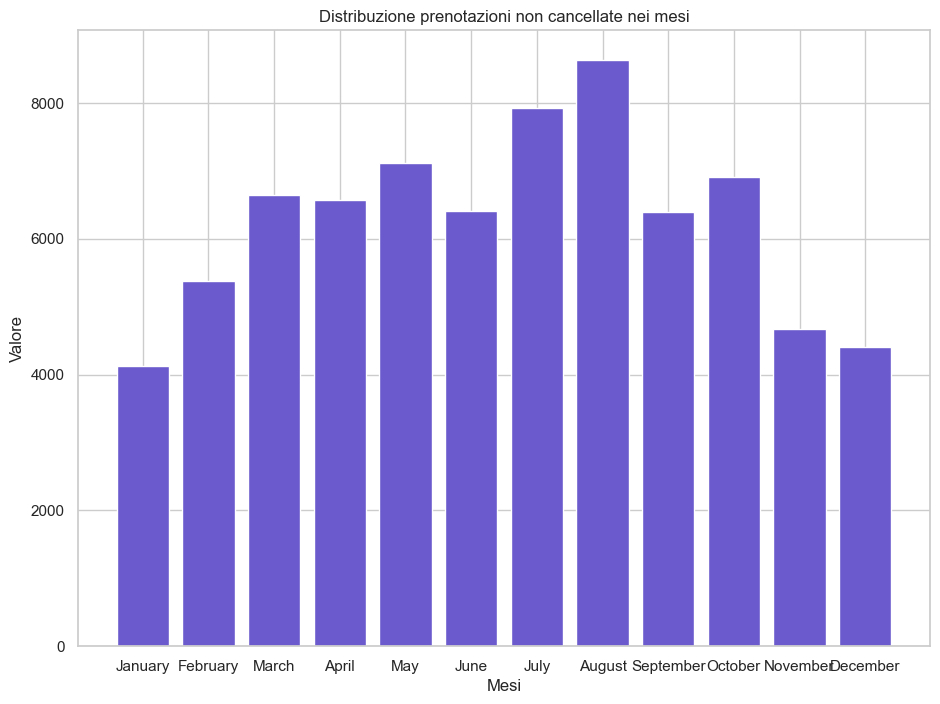

In [98]:
#senza cancellazioni
plt.figure(figsize=(11,8))
plt.bar(hotel1[hotel1['is_canceled']==0].arrival_date_month.value_counts().loc[mesi].index,hotel1[hotel1['is_canceled']==0].arrival_date_month.value_counts().loc[mesi],color='slateblue')
plt.ylabel('Valore')
plt.xlabel('Mesi')
plt.title('Distribuzione prenotazioni non cancellate nei mesi')
plt.show()

In [ ]:
city=hotel1[hotel1['hotel']=='City Hotel']
resort=hotel1[hotel1['hotel']=='Resort Hotel']

In [62]:
resort[(resort['arrival_date_year']==2016)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].sum()


9040

In [63]:
resort[(resort['arrival_date_year']==2017)&(resort['is_canceled']==0)].arrival_date_month.value_counts().sum()

9125

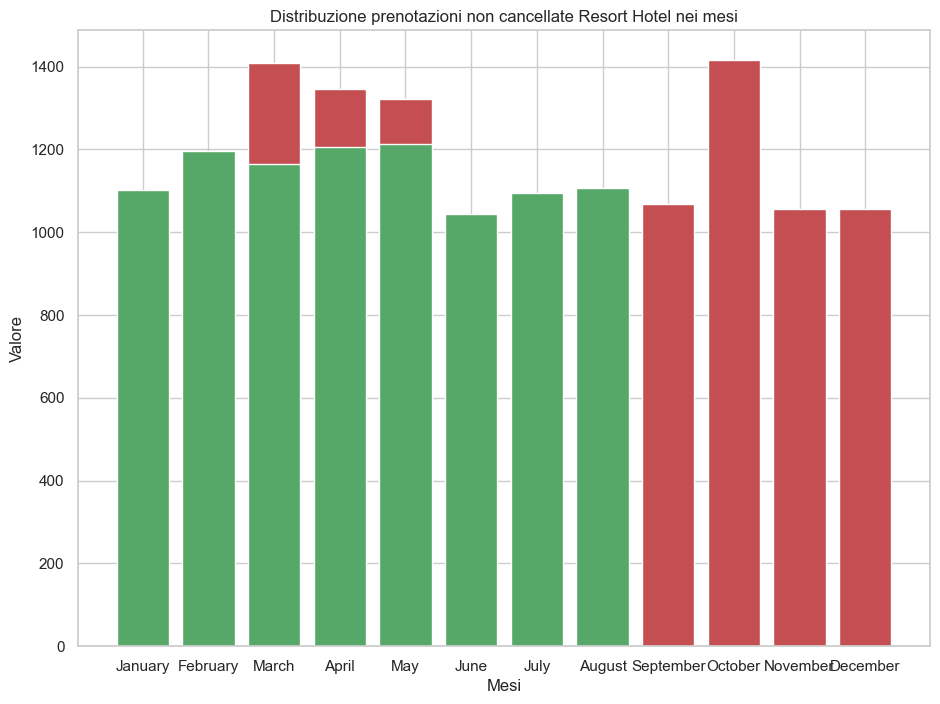

In [54]:
plt.figure(figsize=(11,8))
plt.bar(resort[(resort['arrival_date_year']==2016)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi].index,resort[(resort['arrival_date_year']==2016)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi],color='r')
plt.bar(resort[(resort['arrival_date_year']==2017)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].index,resort[(resort['arrival_date_year']==2017)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]],color='g')
plt.ylabel('Valore')
plt.xlabel('Mesi')
plt.title('Distribuzione prenotazioni non cancellate Resort Hotel nei mesi')
plt.show()

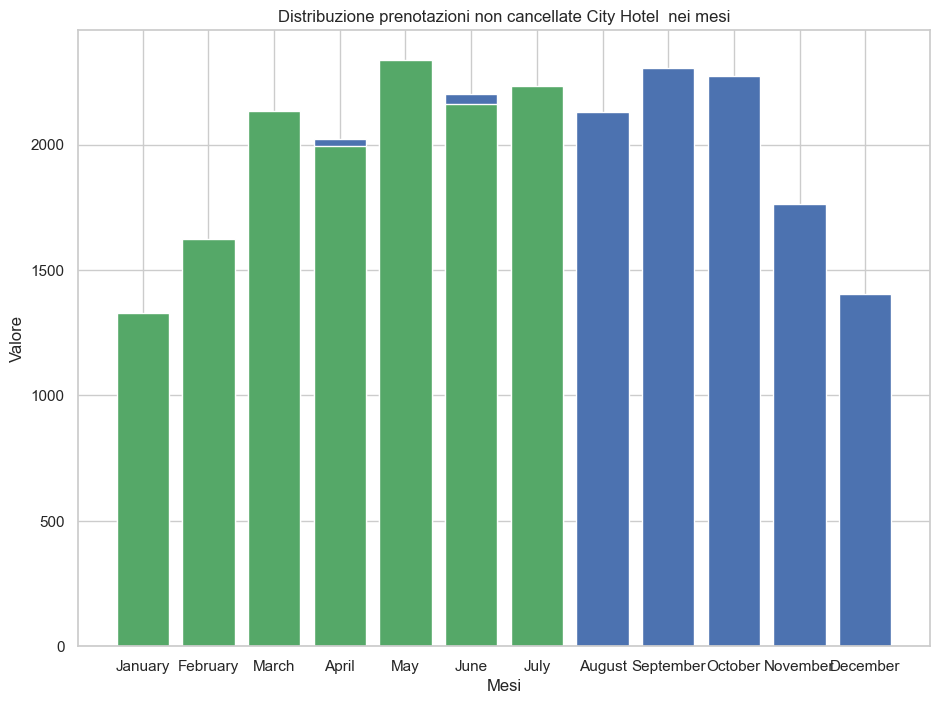

In [39]:
plt.figure(figsize=(11,8))
plt.bar(city[(city['arrival_date_year']==2016)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi].index,city[(city['arrival_date_year']==2016)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi],color='b')
plt.bar(city[(city['arrival_date_year']==2016)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July"]].index,city[(city['arrival_date_year']==2017)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July"]],color='g')
plt.ylabel('Valore')
plt.xlabel('Mesi')
plt.title('Distribuzione prenotazioni non cancellate City Hotel  nei mesi')
plt.show()

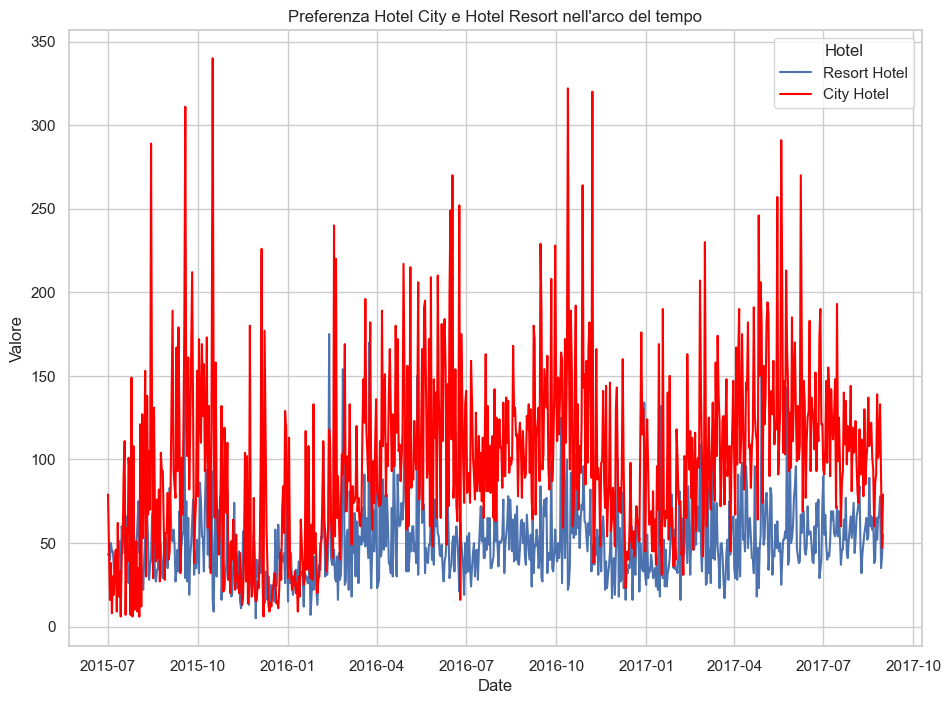

In [85]:
plt.figure(figsize=(11,8))
sns.lineplot(x=hotel[hotel['hotel']=='Resort Hotel'].date.value_counts().index,y=hotel[hotel['hotel']=='Resort Hotel'].date.value_counts(),label='Resort Hotel')
sns.lineplot(x=hotel[hotel['hotel']=='City Hotel'].date.value_counts().index,y=hotel[hotel['hotel']=='City Hotel'].date.value_counts(),color='red',label='City Hotel')
plt.ylabel('Valore')
plt.xlabel('Date')
plt.title("Preferenza Hotel City e Hotel Resort nell'arco del tempo")
plt.legend().set_title('Hotel')
plt.show()

Text(0.5, 1.0, 'Andamento prenotazioni 2015,2016 e 2017')

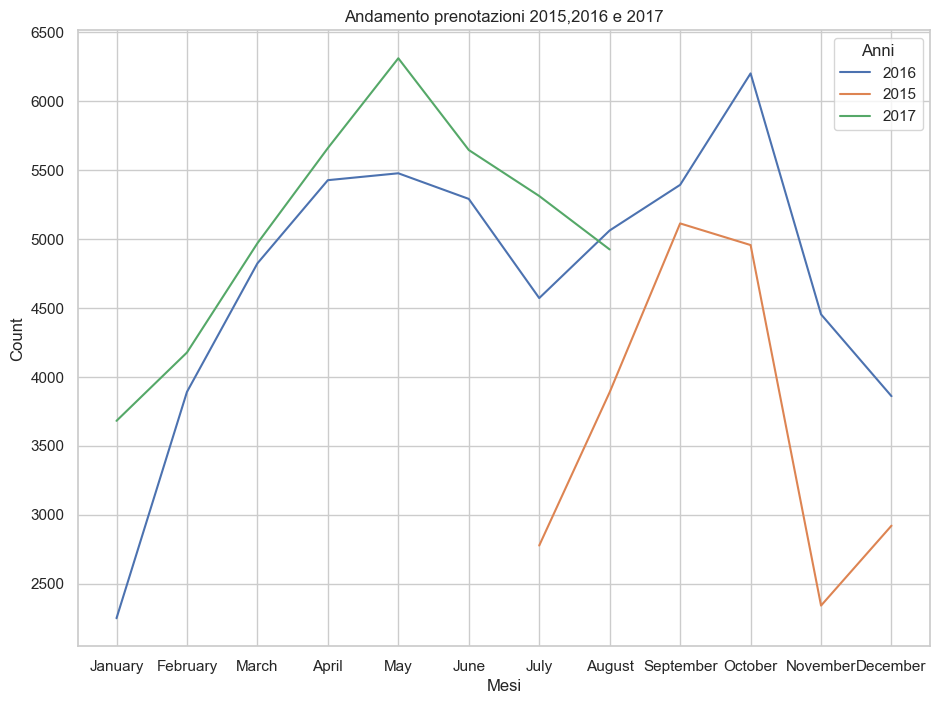

In [49]:
plt.figure(figsize=(11,8))
sns.lineplot(x=hotel1[hotel1['arrival_date_year']==2016].arrival_date_month.value_counts().loc[mesi].index,y=hotel1[hotel1['arrival_date_year']==2016].arrival_date_month.value_counts().loc[mesi],label='2016')
sns.lineplot(x=hotel1[hotel1['arrival_date_year']==2015].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]].index,y=hotel1[hotel1['arrival_date_year']==2015].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]],label='2015')
sns.lineplot(x=hotel1[hotel1['arrival_date_year']==2017].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].index,y=hotel1[hotel1['arrival_date_year']==2017].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]],label='2017')
plt.xticks(hotel1.arrival_date_month.value_counts().index)
plt.legend().set_title('Anni')
plt.ylabel('Count')
plt.xlabel('Mesi')
plt.title('Andamento prenotazioni 2015,2016 e 2017')

Text(0.5, 1.0, 'Andamento prenotazioni 2015,2016 e 2017')

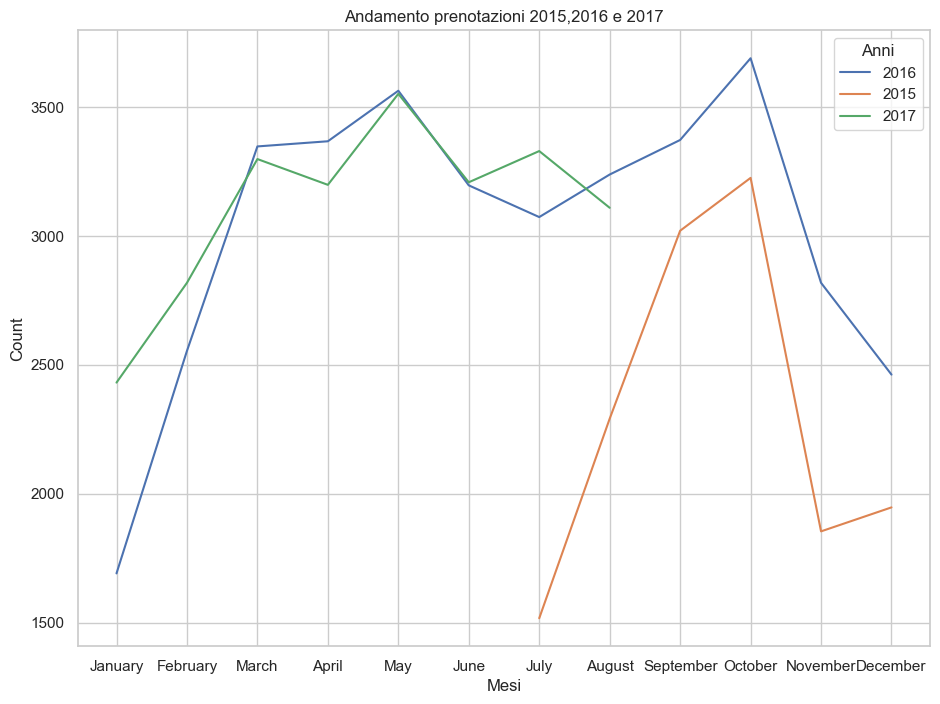

In [55]:
#senza cancellazioni
plt.figure(figsize=(11,8))
sns.lineplot(x=hotel1[(hotel1['arrival_date_year']==2016)&(hotel1['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi].index,y=hotel1[(hotel1['arrival_date_year']==2016)&(hotel1['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi],label='2016')
sns.lineplot(x=hotel1[(hotel1['arrival_date_year']==2015)&(hotel1['is_canceled']==0)].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]].index,y=hotel1[(hotel1['arrival_date_year']==2015)&(hotel1['is_canceled']==0)].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]],label='2015')
sns.lineplot(x=hotel1[(hotel1['arrival_date_year']==2017)&(hotel1['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].index,y=hotel1[(hotel1['arrival_date_year']==2017)&(hotel1['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]],label='2017')
plt.xticks(hotel1.arrival_date_month.value_counts().index)
plt.legend().set_title('Anni')
plt.ylabel('Count')
plt.xlabel('Mesi')
plt.title('Andamento prenotazioni senza cancellazioni 2015,2016 e 2017')

Text(0.5, 1.0, 'Andamento City Hotel prenotazioni 2015,2016 e 2017')

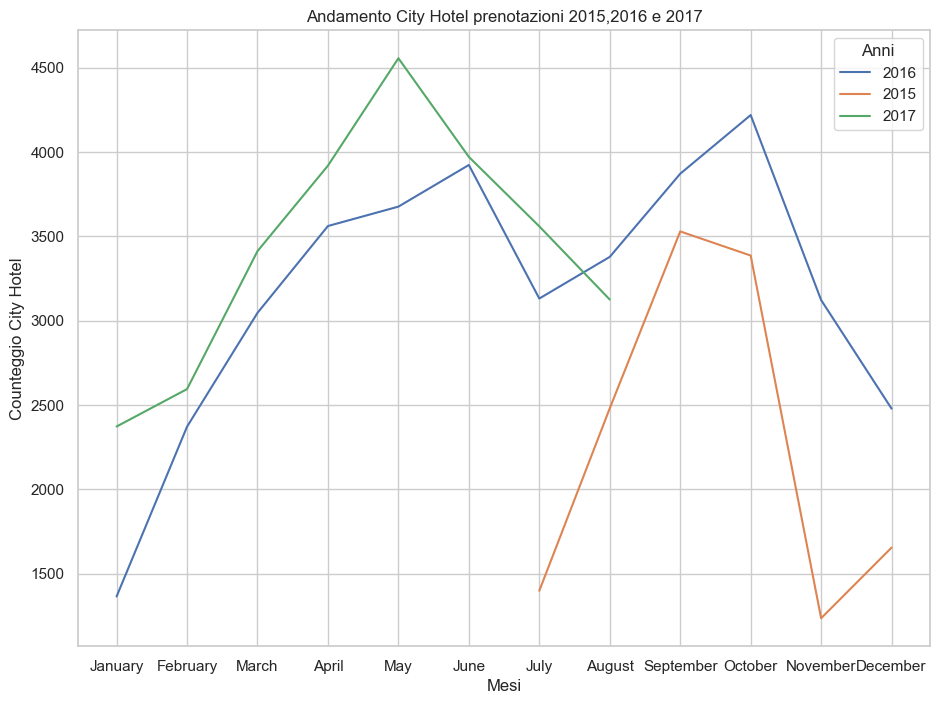

In [56]:
plt.figure(figsize=(11,8))
sns.lineplot(x=city[city['arrival_date_year']==2016].arrival_date_month.value_counts().loc[mesi].index,y=city[city['arrival_date_year']==2016].arrival_date_month.value_counts().loc[mesi],label='2016')
sns.lineplot(x=city[city['arrival_date_year']==2015].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]].index,y=city[city['arrival_date_year']==2015].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]],label='2015')
sns.lineplot(x=city[city['arrival_date_year']==2017].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].index,y=city[city['arrival_date_year']==2017].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]],label='2017')
plt.xticks(city.arrival_date_month.value_counts().index)
plt.legend().set_title('Anni')
plt.ylabel('Counteggio City Hotel')
plt.xlabel('Mesi')
plt.title('Andamento City Hotel prenotazioni 2015,2016 e 2017')

Text(0.5, 1.0, 'Andamento City Hotel prenotazioni senza cancellazioni 2015,2016 e 2017')

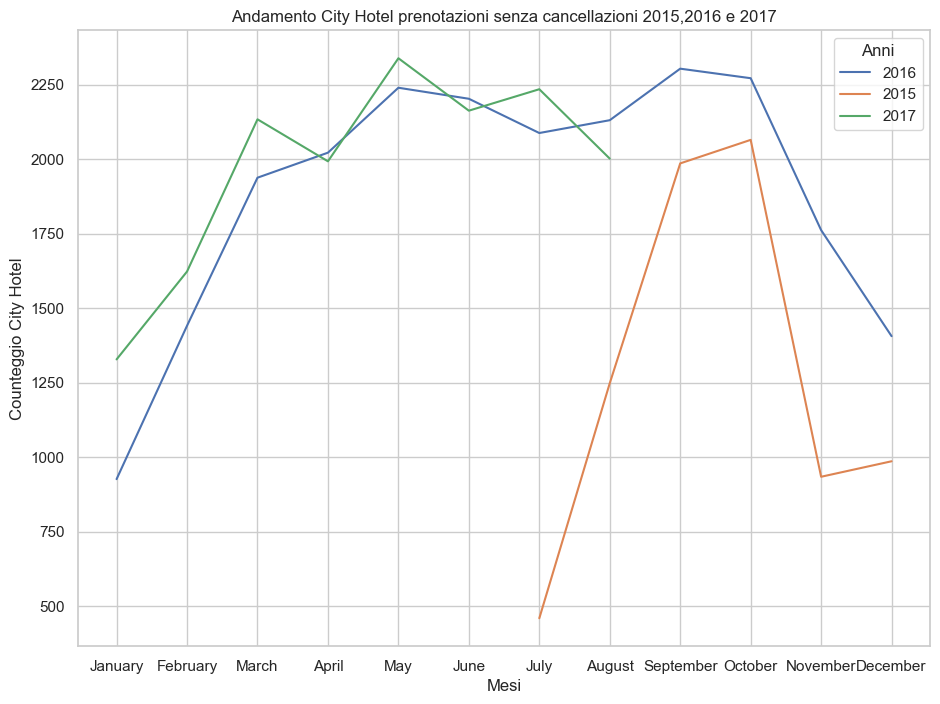

In [60]:
#senza cancellazioni
plt.figure(figsize=(11,8))
sns.lineplot(x=city[(city['arrival_date_year']==2016)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi].index,y=city[(city['arrival_date_year']==2016)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi],label='2016')
sns.lineplot(x=city[(city['arrival_date_year']==2015)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]].index,y=city[(city['arrival_date_year']==2015)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]],label='2015')
sns.lineplot(x=city[(city['arrival_date_year']==2017)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].index,y=city[(city['arrival_date_year']==2017)&(city['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]],label='2017')
plt.xticks(city.arrival_date_month.value_counts().index)
plt.legend().set_title('Anni')
plt.ylabel('Counteggio City Hotel')
plt.xlabel('Mesi')
plt.title('Andamento City Hotel prenotazioni senza cancellazioni 2015,2016 e 2017')

Text(0.5, 1.0, 'Andamento Resort Hotel prenotazioni 2015,2016 e 2017')

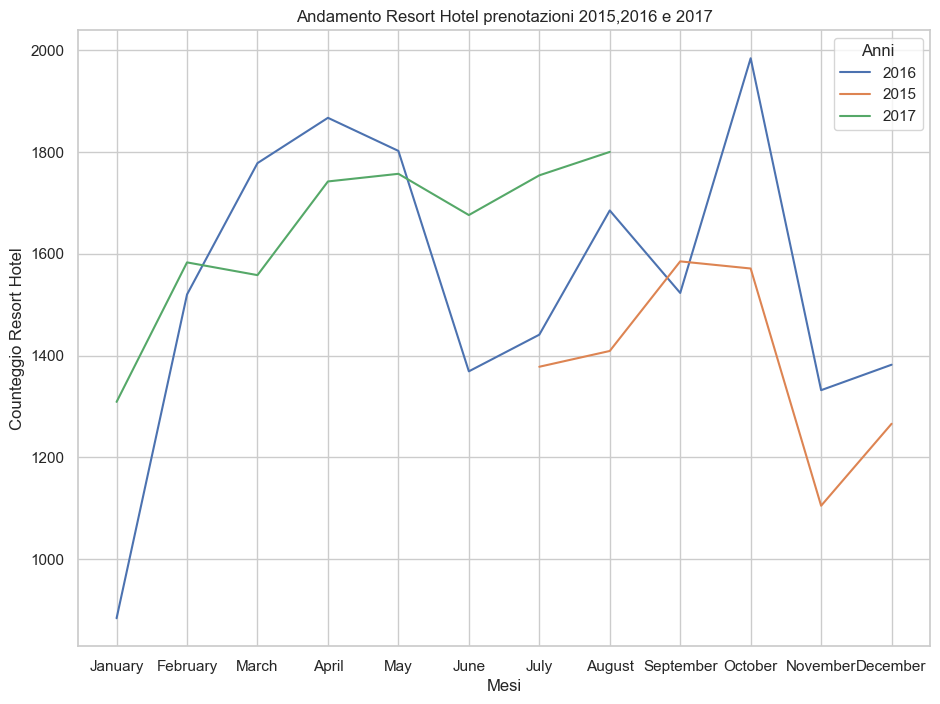

In [58]:
plt.figure(figsize=(11,8))
sns.lineplot(x=resort[resort['arrival_date_year']==2016].arrival_date_month.value_counts().loc[mesi].index,y=resort[resort['arrival_date_year']==2016].arrival_date_month.value_counts().loc[mesi],label='2016')
sns.lineplot(x=resort[resort['arrival_date_year']==2015].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]].index,y=resort[resort['arrival_date_year']==2015].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]],label='2015')
sns.lineplot(x=resort[resort['arrival_date_year']==2017].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].index,y=resort[resort['arrival_date_year']==2017].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]],label='2017')
plt.xticks(resort.arrival_date_month.value_counts().index)
plt.legend().set_title('Anni')
plt.ylabel('Counteggio Resort Hotel')
plt.xlabel('Mesi')
plt.title('Andamento Resort Hotel prenotazioni 2015,2016 e 2017')

Text(0.5, 1.0, 'Andamento Resort Hotel prenotazioni senza cancellazioni 2015,2016 e 2017')

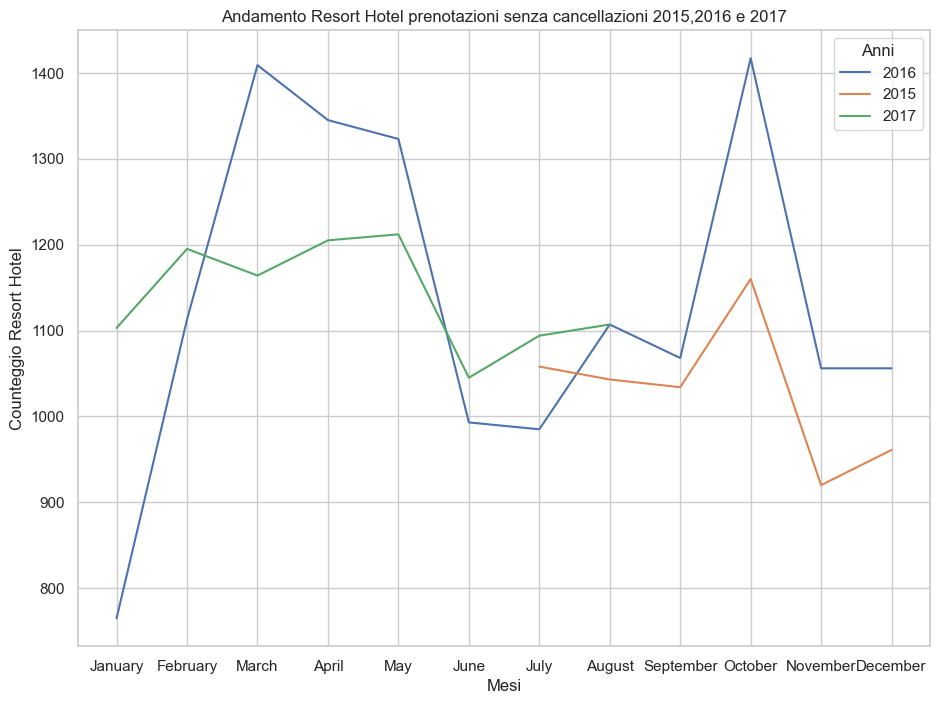

In [59]:
#senza cancellazioni
plt.figure(figsize=(11,8))
sns.lineplot(x=resort[(resort['arrival_date_year']==2016)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi].index,y=resort[(resort['arrival_date_year']==2016)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[mesi],label='2016')
sns.lineplot(x=resort[(resort['arrival_date_year']==2015)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]].index,y=resort[(resort['arrival_date_year']==2015)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[["July","August","September","October","November","December"]],label='2015')
sns.lineplot(x=resort[(resort['arrival_date_year']==2017)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]].index,y=resort[(resort['arrival_date_year']==2017)&(resort['is_canceled']==0)].arrival_date_month.value_counts().loc[["January","February","March","April","May","June","July","August"]],label='2017')
plt.xticks(resort.arrival_date_month.value_counts().index)
plt.legend().set_title('Anni')
plt.ylabel('Counteggio Resort Hotel')
plt.xlabel('Mesi')
plt.title('Andamento Resort Hotel prenotazioni senza cancellazioni 2015,2016 e 2017')

In [87]:
lista=[6930/len(hotel)*100,51283/len(hotel)*100,60462/len(hotel)*100,715/len(hotel)*100]
classi=['weekend_nights','week_nights','week/weekend_nights','no_nights']
settimana=pd.DataFrame({'perc':lista},index=classi)
settimana.perc=round(settimana.perc,2)
settimana

,perc
weekend_nights,5.80
week_nights,42.95
week/weekend_nights,50.64
no_nights,0.60


Text(0.5, 1.0, 'Andamento notti durante la settimana')

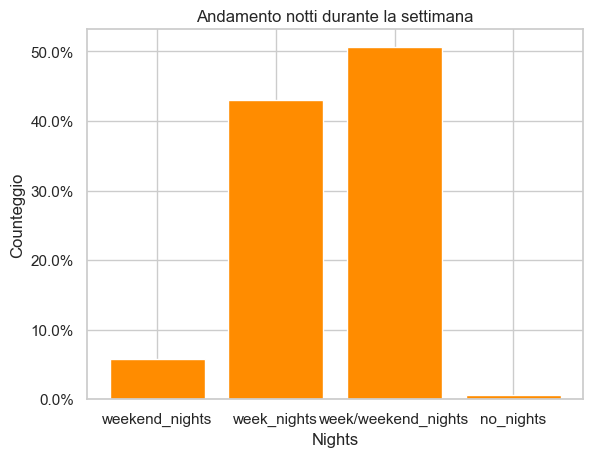

In [88]:

plt.bar(settimana.index,settimana.perc,color='darkorange')
def percent_formatter(x, pos):
    return f'{x}%'

y_format = FuncFormatter(percent_formatter)
plt.gca().yaxis.set_major_formatter(y_format)
plt.ylabel('Counteggio')
plt.xlabel('Nights')
plt.title('Andamento notti durante la settimana')

In [26]:
lista1=[3175/len(city[city['is_canceled']==0])*100,21253/len(city[city['is_canceled']==0])*100,21492/len(city[city['is_canceled']==0])*100,308/len(city[city['is_canceled']==0])*100]
classi=['weekend_nights','week_nights','week/weekend_nights','no_nights']
settimana1=pd.DataFrame({'perc_city':lista1},index=classi)
settimana1.perc_city=round(settimana1.perc_city,2)
settimana1

,perc_city
weekend_nights,6.87
week_nights,45.97
week/weekend_nights,46.49
no_nights,0.67


In [272]:
hotel.is_canceled.value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [408]:
hotel[hotel['is_canceled']==0].reserved_room_type.value_counts()

reserved_room_type
A    52364
D    13099
E     4621
F     2017
G     1331
B      750
C      624
H      356
L        4
Name: count, dtype: int64

In [405]:
hotel[hotel['is_canceled']==0].assigned_room_type.value_counts()

assigned_room_type
A    41105
D    18960
E     5838
F     2824
C     1929
G     1773
B     1651
H      461
I      358
K      267
Name: count, dtype: int64

<Axes: xlabel='arrival_date_day_of_month', ylabel='days_in_waiting_list'>

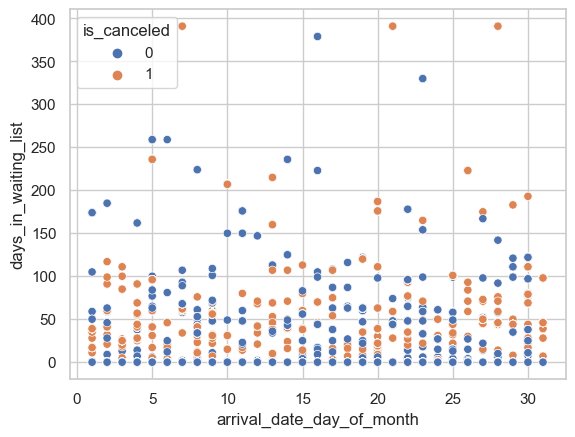

In [456]:
sns.scatterplot(y='days_in_waiting_list',x='arrival_date_day_of_month',data=hotel1,hue='is_canceled')

In [374]:
city[city['is_canceled']==0].lead_time.mean()

80.70273427360041

In [375]:
resort[resort['is_canceled']==0].lead_time.mean()

78.83761835648627

In [373]:
hotel.lead_time.mean()

104.01141636652986

In [389]:
hotel[hotel['is_canceled']==0].days_in_waiting_list.mean()

1.5898677593592847

In [388]:
hotel[hotel['is_canceled']==1].days_in_waiting_list.mean()

3.564082850940666

In [448]:
hotel.groupby(by='deposit_type')['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: count, dtype: int64

In [230]:
av_city=hotel1[(hotel1['is_canceled']==0)|(hotel['is_canceled']==1)&(hotel['deposit_type']=='Non Refund')]
av_city=av_city[av_city['hotel']=='City Hotel']

In [231]:
av_resort=hotel1[(hotel1['is_canceled']==0)|(hotel['is_canceled']==1)&(hotel['deposit_type']=='Non Refund')]
av_resort=av_resort[av_resort['hotel']=='Resort Hotel']

Text(0.5, 1.0, 'Average Daily Revenue per City Hotel nei mesi')

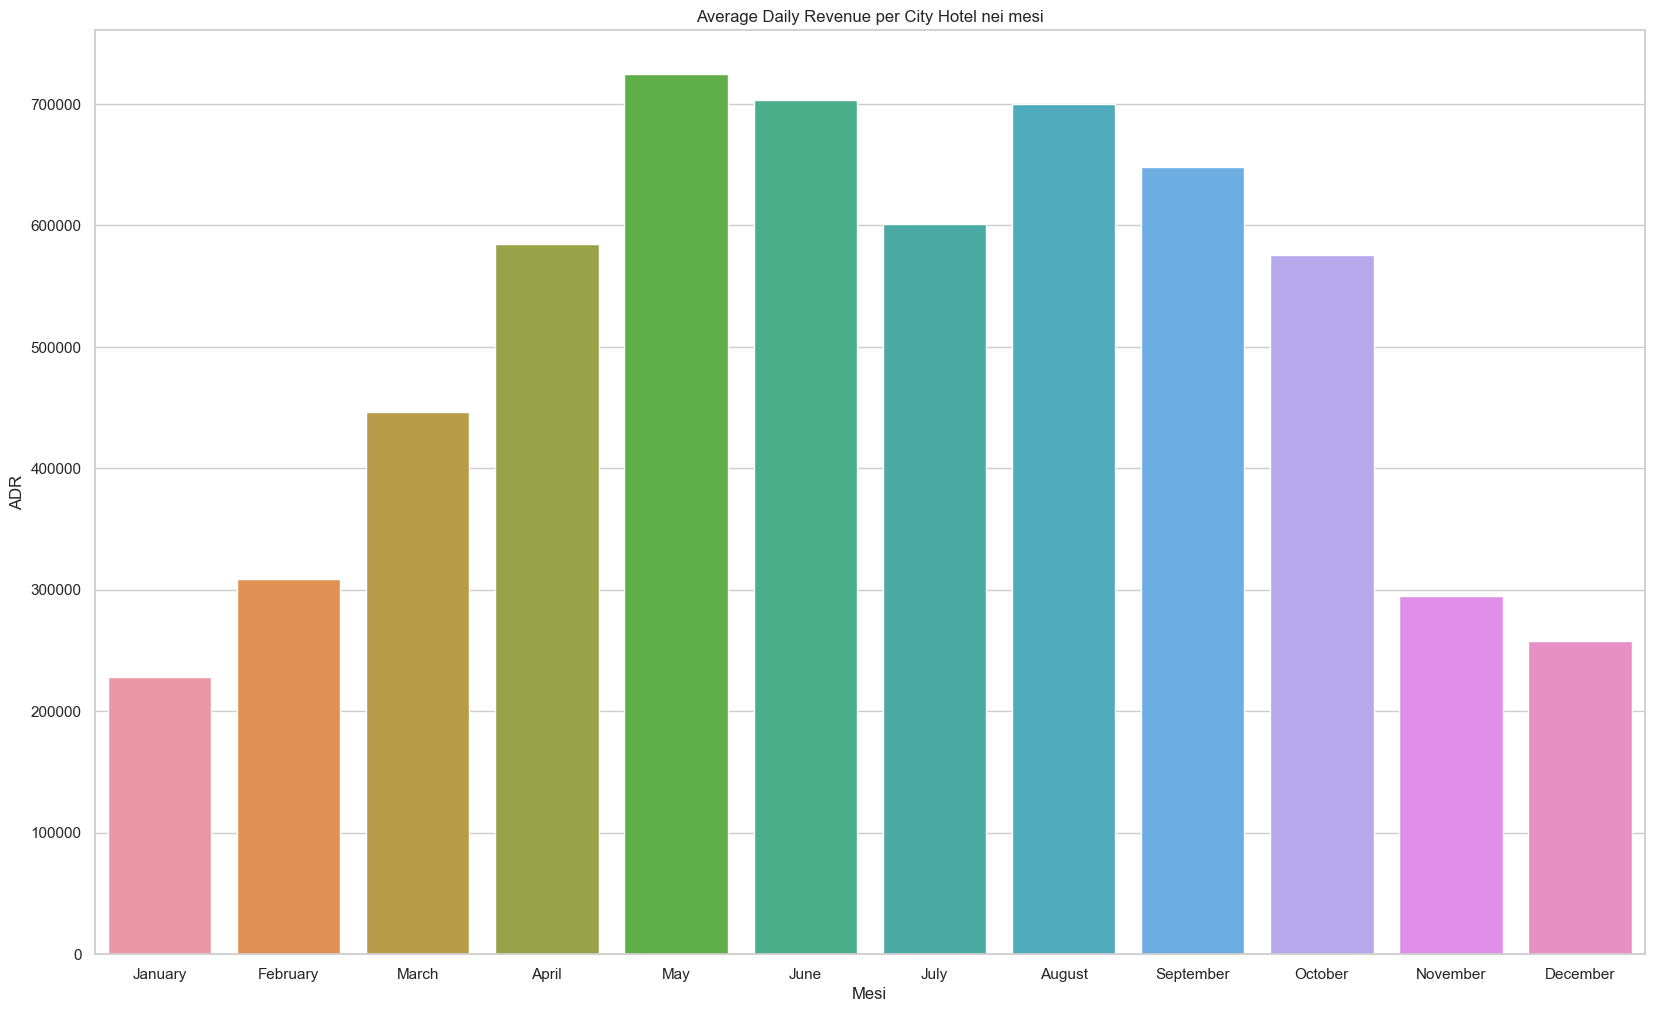

In [232]:
plt.figure(figsize=(20,12))
sns.barplot(x='arrival_date_month',y='adr', data=av_city.groupby('arrival_date_month')[['adr']].sum().loc[mesi].reset_index())
plt.ylabel('ADR')
plt.xlabel('Mesi')
plt.title('Average Daily Revenue per City Hotel nei mesi')

Text(0.5, 1.0, 'Average Daily Revenue per Resort Hotel nei mesi')

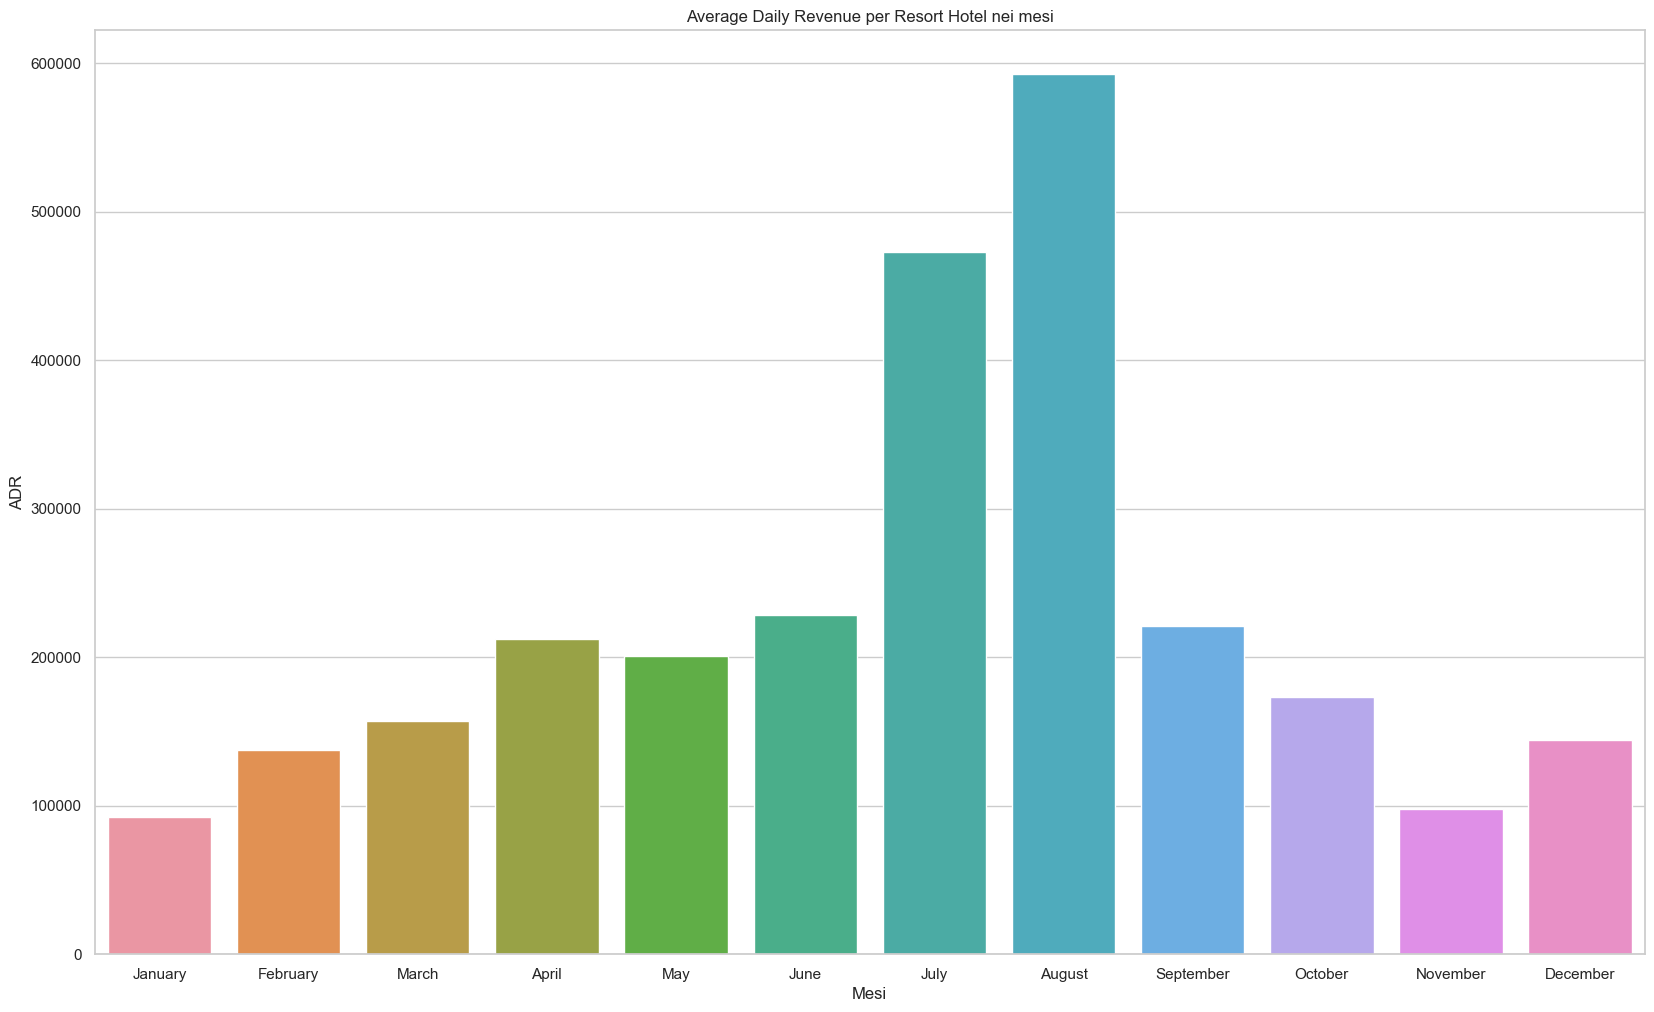

In [233]:
plt.figure(figsize=(20,12))
sns.barplot(x='arrival_date_month',y='adr', data=av_resort.groupby('arrival_date_month')[['adr']].sum().loc[mesi].reset_index())
plt.ylabel('ADR')
plt.xlabel('Mesi')
plt.title('Average Daily Revenue per Resort Hotel nei mesi')


In [229]:
hotel1[(hotel1['is_canceled']==0)|(hotel['is_canceled']==1)&(hotel['deposit_type']=='Non Refund')].groupby('hotel').adr.sum()


hotel
City Hotel      6073673
Resort Hotel    2730111
Name: adr, dtype: int64

In [234]:
hotel1[(hotel1['is_canceled']==0)|(hotel['is_canceled']==1)&(hotel['deposit_type']=='Non Refund')].groupby('hotel').adr.mean()


hotel
City Hotel      102.818137
Resort Hotel     89.254315
Name: adr, dtype: float64

In [228]:
hotel.adr.sum()

12133219

In [227]:
hotel.adr.sum()-hotel1[(hotel['is_canceled']==1)&(hotel['deposit_type']!='Non Refund')].adr.sum()

8803784

In [190]:
margine=[]

for i in (mesi):
    soldi=hotel1[(hotel1['arrival_date_month']==i)&(hotel['is_canceled']==0)].adr.sum()+hotel1[(hotel1['arrival_date_month']==i)&(hotel['is_canceled']==1)&(hotel['deposit_type']=='Non Refund')].adr.sum()
    margine.append(soldi)


In [191]:
margine

[321223,
 446348,
 603549,
 796699,
 924963,
 931606,
 1074402,
 1292604,
 868908,
 749063,
 392603,
 401816]

Text(0.5, 1.0, 'Andamento Average Daily Rate nei mesi dal 2015 al 2017')

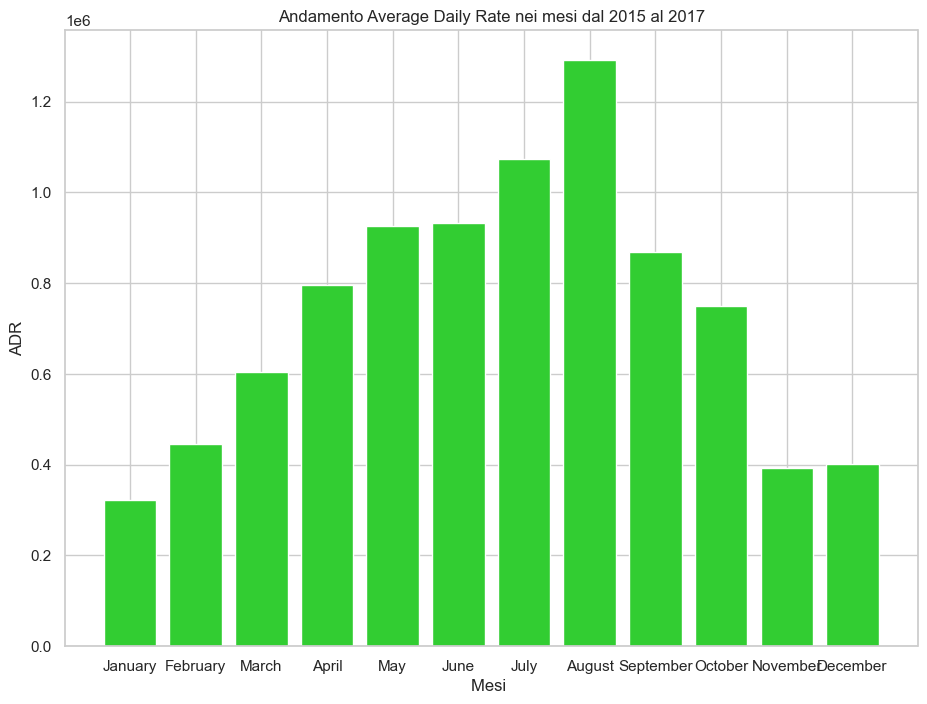

In [161]:
plt.figure(figsize=(11,8))
plt.bar(mesi,margine,color='limegreen')
plt.ylabel('ADR')
plt.xlabel('Mesi ')
plt.title('Andamento Average Daily Rate nei mesi dal 2015 al 2017')   


In [163]:
margine=[]

for i in (hotel1.arrival_date_year.unique()):
    soldi=hotel1[(hotel1['arrival_date_year']==i)&(hotel['is_canceled']==0)].adr.sum()+hotel1[(hotel1['arrival_date_year']==i)&(hotel['is_canceled']==1)&(hotel['deposit_type']=='Non Refund')].adr.sum()
    margine.append(soldi)

In [164]:
margine

[1528352, 4086956, 3188476]

Text(0.5, 1.0, 'Andamento Average Daily Rate dal 2015 al 2017')

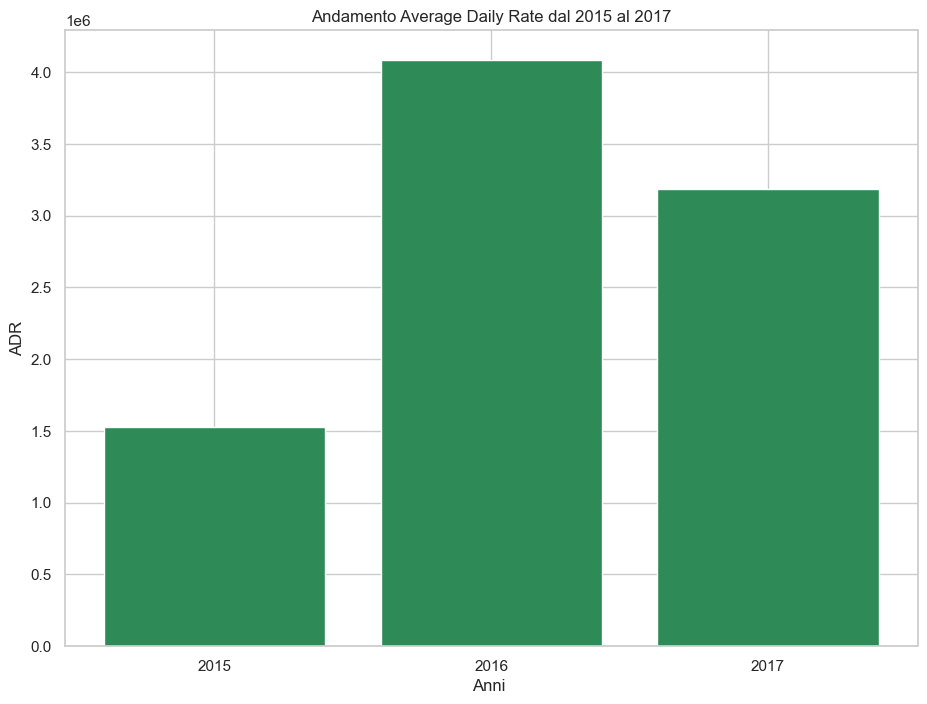

In [167]:
plt.figure(figsize=(11,8))
plt.bar(hotel1.arrival_date_year.unique(),margine,color='seagreen')
plt.xticks(hotel1.arrival_date_year.unique())
plt.ylabel('ADR')
plt.xlabel('Anni ')
plt.title('Andamento Average Daily Rate dal 2015 al 2017')   


Text(0.5, 1.0, 'Prenotazioni per anno')

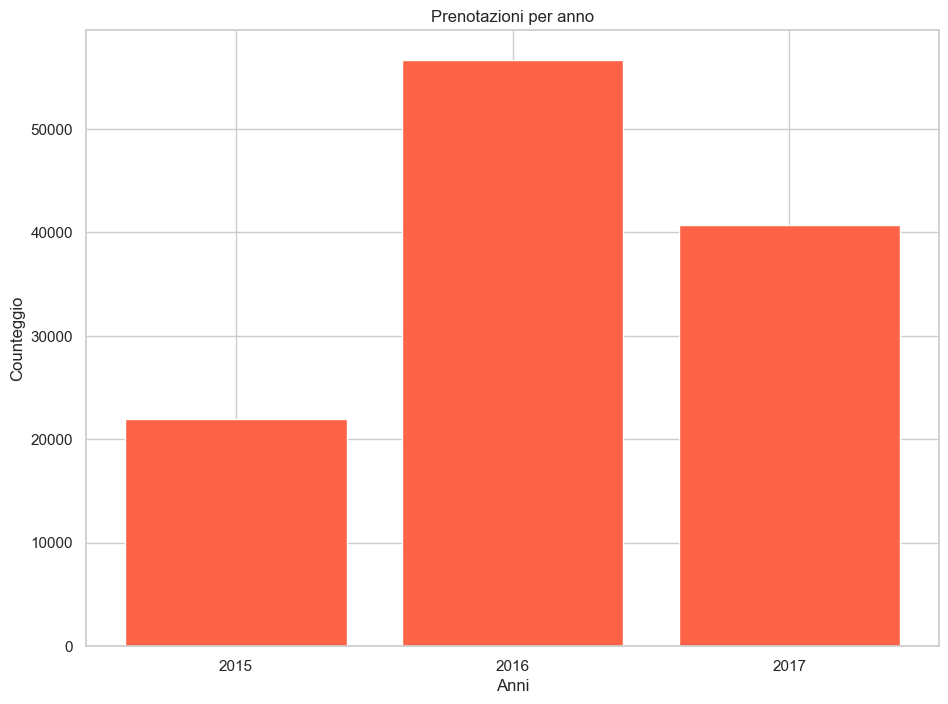

In [106]:
plt.figure(figsize=(11,8))
plt.bar(hotel1.arrival_date_year.value_counts().index,hotel1.arrival_date_year.value_counts(),color='tomato')
plt.xticks(hotel1.arrival_date_year.value_counts().index)
plt.ylabel('Counteggio')
plt.xlabel('Anni')
plt.title('Prenotazioni per anno')

In [137]:
money=pd.DataFrame({'Mesi':mesi},index=(1,2,3,4,5,6,7,8,9,10,11,12))
margine=[]
for e in range(2015,2018):
    margine=[]
    for i in (mesi):
        soldi=hotel1[(hotel1['arrival_date_month']==i)&(hotel['is_canceled']==0)&(hotel1['arrival_date_year']==e)].adr.sum()+hotel1[(hotel1['arrival_date_year']==e)&(hotel['is_canceled']==1)&(hotel['deposit_type']=='Non Refund')&(hotel1['arrival_date_month']==i)].adr.sum()
        margine.append(soldi)

    money[e]=margine
   
    

In [138]:
money[2015].sum()+money[2016].sum()+money[2017].sum()

8803784

In [139]:
money=money.replace(0, np.nan)
money

,Mesi,2015,2016,2017
1,January,NaN,119654,201569.0
2,February,NaN,211397,234951.0
3,March,NaN,295047,308502.0
4,April,NaN,366602,430097.0
5,May,NaN,398760,526203.0
6,June,NaN,434470,497136.0
7,July,181910.0,408860,483632.0
8,August,301357.0,484861,506386.0
9,September,411873.0,457035,NaN
10,October,339085.0,409978,NaN


Text(0.5, 1.0, 'Averege Daily Rate negli anni')

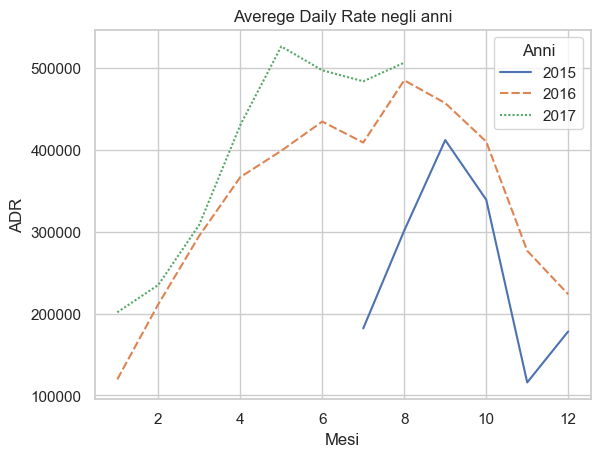

In [142]:
sns.lineplot(money)
plt.ylabel('ADR')
plt.xlabel('Mesi')
plt.legend().set_title('Anni')
plt.title('Averege Daily Rate negli anni')

In [122]:
canceled=pd.DataFrame({'Mesi':mesi},index=(1,2,3,4,5,6,7,8,9,10,11,12))
for e in range(2015,2018):
    cancellati=[]
    for i in (mesi):
        soldi=hotel1[(hotel1['arrival_date_month']==i)&(hotel['is_canceled']==1)&(hotel1['arrival_date_year']==e)].arrival_date_month.value_counts().sum()
        cancellati.append(soldi)
    canceled[e]=cancellati
   
    

In [127]:
canceled=canceled.replace(0, np.nan)
canceled

,Mesi,2015,2016,2017
1,January,NaN,557,1250.0
2,February,NaN,1337,1359.0
3,March,NaN,1477,1672.0
4,April,NaN,2061,2463.0
5,May,NaN,1915,2762.0
6,June,NaN,2096,2439.0
7,July,1259.0,1499,1984.0
8,August,1598.0,1825,1816.0
9,September,2094.0,2022,NaN
10,October,1732.0,2514,NaN


Text(0.5, 1.0, 'Cancellazione nei mesi per anno')

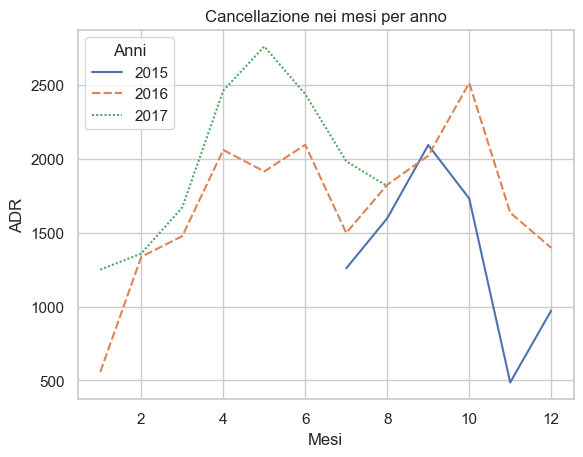

In [141]:
sns.lineplot(canceled)
plt.ylabel('ADR')
plt.xlabel('Mesi')
plt.legend().set_title('Anni')
plt.title('Cancellazione nei mesi per anno')

In [155]:
resort[(resort['arrival_date_year']==2016)&(resort['is_canceled']==0)].groupby(by='arrival_date_month').adr.mean().loc[["January","February","March","April","May","June","July","August","September","October","November","December"]]

In [152]:
resort[(resort['arrival_date_year']==2017)&(resort['is_canceled']==0)].groupby(by='arrival_date_month').adr.mean().loc[["January","February","March","April","May","June","July","August"]]

In [156]:
df=pd.DataFrame({'Mesi':mesi,},index=(1,2,3,4,5,6,7,8,9,10,11,12))


In [157]:

for e in range(2015,2018):
    cancellati=[]
    for i in (mesi):
        soldi=hotel1[(hotel1['arrival_date_month']==i)&(hotel['is_canceled']==0)&(hotel1['arrival_date_year']==e)].arrival_date_month.value_counts().sum()
        cancellati.append(soldi)
    df[e]=cancellati
   

,Mesi,2016
1,January,NaN
2,February,NaN
3,March,NaN
4,April,NaN
5,May,NaN
6,June,NaN
7,July,NaN
8,August,NaN
9,September,NaN
10,October,NaN


In [132]:
city[(city['arrival_date_year']==2016)&(city['is_canceled']==0)].groupby(by='arrival_date_month').adr.mean().loc[["January","February","March","April","May","June","July","August","September","October","November","December"]]

arrival_date_month
January       78.369863
February      76.618280
March         98.816787
April         99.536062
May          107.974930
June         111.212209
July         106.090125
August       113.552526
September    114.656669
October      105.961479
November      92.710294
December      91.989739
Name: adr, dtype: float64

In [135]:
city[(city['arrival_date_year']==2017)&(city['is_canceled']==0)].groupby(by='arrival_date_month').adr.mean().loc[["January","February","March","April","May","June","July","August"]]

arrival_date_month
January      86.692018
February     89.618608
March        92.089972
April       124.348721
May         131.299701
June        128.471567
July        125.096644
August      137.386114
Name: adr, dtype: float64

In [55]:
df=pd.DataFrame({'info':resort[(resort['arrival_date_year']==2016)&(resort['is_canceled']==0)].groupby(by='arrival_date_month').adr.mean().loc[mesi]})

In [56]:
df

,info
arrival_date_month,
January,45.262745
February,51.477089
March,55.674947
April,66.849814
May,70.851096
June,97.934542
July,152.993909
August,186.842818
September,104.019663
